In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Create Table 

In [2]:
import sqlite3

# create an SQLite database in memory 
conn = sqlite3.connect(":memory") # This creates a temporary database 
cursor = conn.cursor()

# Create the books_read table 
cursor.execute("""
CREATE TABLE books_read(
id INTEGER PRIMARY KEY, 
title TEXT, 
author TEXT, 
genre TEXT, 
year_read INTEGER, 
my_rating INTEGER, 
goodreads_rating INTEGER
)
""")
print("Table 'books_read' created successfully!")

Table 'books_read' created successfully!


# Insert sample data into table

In [3]:
# Insert corrected data
books_data = [
    ("Queenie", "Candice Carty-Williams", "New adult fiction", 2022, 3, 3.88),
    ("Mrs. Palfrey at the Claremont", "Elizabeth Taylor", "Literary fiction", 2022, 4, 4),
    ("Tales from the Cafe", "Toshikazu Kawaguchi", "Magical realism", 2022, 3, 3.99),
    ("Woman of the Ashes", "Mia Cuoto", "Historical fiction", 2022, 2, 3.84),
    ("If Beale Street Could Talk", "James Baldwin", "Fiction", 2022, 4, 4.27),
    ("Writers at Work Around the World", "The Paris Review", "Nonfiction", 2022, 4, 4.5),
    ("Convenience Store Woman", "Sayaka Murata", "Fiction", 2022, 3, 3.72),
    ("Things Fall Apart", "Chinua Achebe", "Historical fiction", 2022, 4, 3.71),
    ("Before the Coffee Gets Cold", "Toshikazu Kawaguchi", "Magical realism", 2021, 4, 3.75),
    ("Dear America: Notes of an Undocumented Citizen", "Jose Antonio Vargas", "Nonfiction", 2021, 4, 4.31),
    ("Little Weirds", "Jenny Slate", "Autobiography", 2021, 3, 3.85),
    ("Brave New World", "Aldous Huxley", "Dystopian Fiction", 2021, 4, 3.99),
    ("Sincerely,", "F.S. Yousaf", "Poetry", 2021, 3, 3.86),
    ("The Handmaid's Tale", "Margaret Atwood", "Dystopian fiction", 2021, 3, 4.12),
    ("Nickel and Dimed: On (Not) Getting by in America", "Barbara Ehrenreich", "Nonfiction", 2021, 2, 3.64),
    ("The Bell Jar", "Sylvia Plath", "Autobiographical novel", 2021, 4, 4.03),
    ("A Little Life", "Hanya Yanagihara", "Fiction", 2021, 2, 4.33),
    ("The Glass Castle", "Jeannette Walls", "Autobiography", 2021, 4, 4.29),
    ("The Catcher in the Rye", "J.D. Salinger", "Fiction", 2021, 4, 3.81),
    ("Frankenstein", "Mary Shelley", "Science fiction", 2020, 4, 3.84),
    ("Harry Potter and the Deathly Hallows", "J.K. Rowling", "Children's literature", 2020, 4, 4.62),
    ("Gone Girl", "Gillian Flynn", "Thriller", 2020, 3, 4.11),
    ("Flowers for Algernon", "Daniel Keyes", "Science fiction", 2020, 4, 4.17),
    ("Skipping Christmas", "John Grisham", "Humor", 2019, 3, 3.52),
    ("Talking as Fast as I Can", "Lauren Graham", "Autobiography", 2019, 3, 3.95),
    ("The Metamorphosis", "Franz Kafka", "Fantasy Fiction", 2019, 3, 3.84),
    ("Fahrenheit 451", "Ray Bradbury", "Science fiction", 2019, 3, 3.98),
    ("1984", "George Orwell", "Dystopian fiction", 2019, 4, 4.19),
    ("Chronicle of a Death Foretold", "Gabriel Garcia Marquez", "Fiction", 2019, 4, 3.97),
    ("To Kill a Mockingbird", "Harper Lee", "Fiction", 2018, 4, 4.27),
    ("One Hundred Years of Solitude", "Gabriel Garcia Marquez", "Magical realism", 2017, 5, 4.1),
    ("The Ruins of Us", "Keija Parssinen", "Literary fiction", 2017, 3, 3.64),
]

# Insert data into the table
cursor.executemany("""
INSERT INTO books_read (title, author, genre, year_read, my_rating, goodreads_rating)
VALUES (?, ?, ?, ?, ?, ?)
""", books_data)

conn.commit()

print("Books data inserted successfully!")


Books data inserted successfully!


In [4]:
# Read the data from SQLite into a pandas DataFrame
query = "SELECT * FROM books_read"
df = pd.read_sql_query(query, conn)

# Display the table
df

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,1,Queenie,Candice Carty-Williams,New adult fiction,2022,3,3.88
1,2,Mrs. Palfrey at the Claremont,Elizabeth Taylor,Literary fiction,2022,4,4.00
2,3,Tales from the Cafe,Toshikazu Kawaguchi,Magical realism,2022,3,3.99
3,4,Woman of the Ashes,Mia Cuoto,Historical fiction,2022,2,3.84
4,5,If Beale Street Could Talk,James Baldwin,Fiction,2022,4,4.27
5,6,Writers at Work Around the World,The Paris Review,Nonfiction,2022,4,4.50
6,7,Convenience Store Woman,Sayaka Murata,Fiction,2022,3,3.72
7,8,Things Fall Apart,Chinua Achebe,Historical fiction,2022,4,3.71
8,9,Before the Coffee Gets Cold,Toshikazu Kawaguchi,Magical realism,2021,4,3.75
9,10,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,Nonfiction,2021,4,4.31


## Analyze Goodreads Data

In [5]:
# Find books rated lower on Goodreads than your rating
query = """
select title, my_rating, goodreads_rating 
from books_read
where my_rating > goodreads_rating
"""
df_lower_rated = pd.read_sql_query(query, conn)
df_lower_rated

,title,my_rating,goodreads_rating
0,Things Fall Apart,4,3.71
1,Before the Coffee Gets Cold,4,3.75
2,Brave New World,4,3.99
3,The Catcher in the Rye,4,3.81
4,Frankenstein,4,3.84
5,Chronicle of a Death Foretold,4,3.97
6,One Hundred Years of Solitude,5,4.10


In [6]:
# Count books read per year
query = """
select year_read, count(*) as total_books
from books_read 
group by year_read
order by year_read desc
"""
df_books_per_year = pd.read_sql_query(query, conn)
df_books_per_year

,year_read,total_books
0,2022,8
1,2021,11
2,2020,4
3,2019,6
4,2018,1
5,2017,2


In [7]:
# Find my top-rated books
query = """
select title, author, my_rating 
from books_read 
where my_rating = 5
"""
df_top_books = pd.read_sql_query(query, conn)
df_top_books

,title,author,my_rating
0,One Hundred Years of Solitude,Gabriel Garcia Marquez,5


In [8]:
# --Display all books I've rated through Goodreads from highest to lowest rating
query = """
select title, author, my_rating, goodreads_rating
from books_read 
order by my_rating desc
"""
df_high_to_low = pd.read_sql_query(query, conn)
df_high_to_low

,title,author,my_rating,goodreads_rating
0,One Hundred Years of Solitude,Gabriel Garcia Marquez,5,4.10
1,Mrs. Palfrey at the Claremont,Elizabeth Taylor,4,4.00
2,If Beale Street Could Talk,James Baldwin,4,4.27
3,Writers at Work Around the World,The Paris Review,4,4.50
4,Things Fall Apart,Chinua Achebe,4,3.71
5,Before the Coffee Gets Cold,Toshikazu Kawaguchi,4,3.75
6,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,4,4.31
7,Brave New World,Aldous Huxley,4,3.99
8,The Bell Jar,Sylvia Plath,4,4.03
9,The Glass Castle,Jeannette Walls,4,4.29


In [9]:
# --Display which authors I've read more than once, sorted from most to least works read
query = """
select author, count(*) as total_books_read_by_that_author
from books_read
group by author 
having total_books_read_by_that_author > 1
order by total_books_read_by_that_author desc
"""
df_total_books_read_by_that_author = pd.read_sql_query(query, conn)
df_total_books_read_by_that_author

,author,total_books_read_by_that_author
0,Toshikazu Kawaguchi,2
1,Gabriel Garcia Marquez,2


In [10]:
# --Which books did I rate lower than the Goodreads average rating? (repetition)
query = """
select title, author, goodreads_rating, my_rating 
from books_read 
where my_rating < goodreads_rating 
order by goodreads_rating desc
"""
df_lower_rated_by_me = pd.read_sql_query(query, conn)
df_lower_rated_by_me

,title,author,goodreads_rating,my_rating
0,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,4
1,Writers at Work Around the World,The Paris Review,4.50,4
2,A Little Life,Hanya Yanagihara,4.33,2
3,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,4.31,4
4,The Glass Castle,Jeannette Walls,4.29,4
5,If Beale Street Could Talk,James Baldwin,4.27,4
6,To Kill a Mockingbird,Harper Lee,4.27,4
7,1984,George Orwell,4.19,4
8,Flowers for Algernon,Daniel Keyes,4.17,4
9,The Handmaid's Tale,Margaret Atwood,4.12,3


In [11]:
df

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,1,Queenie,Candice Carty-Williams,New adult fiction,2022,3,3.88
1,2,Mrs. Palfrey at the Claremont,Elizabeth Taylor,Literary fiction,2022,4,4.00
2,3,Tales from the Cafe,Toshikazu Kawaguchi,Magical realism,2022,3,3.99
3,4,Woman of the Ashes,Mia Cuoto,Historical fiction,2022,2,3.84
4,5,If Beale Street Could Talk,James Baldwin,Fiction,2022,4,4.27
5,6,Writers at Work Around the World,The Paris Review,Nonfiction,2022,4,4.50
6,7,Convenience Store Woman,Sayaka Murata,Fiction,2022,3,3.72
7,8,Things Fall Apart,Chinua Achebe,Historical fiction,2022,4,3.71
8,9,Before the Coffee Gets Cold,Toshikazu Kawaguchi,Magical realism,2021,4,3.75
9,10,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,Nonfiction,2021,4,4.31


In [12]:
# --Update table with a new rating for 'To Kill a Mockingbird'
# Step 1: Find the book's ID (optional check)
query = "SELECT id, title, author, my_rating FROM books_read WHERE title = 'To Kill a Mockingbird'"
df_mockingbird_before = pd.read_sql_query(query, conn)
df_mockingbird_before

,id,title,author,my_rating
0,30,To Kill a Mockingbird,Harper Lee,4


In [13]:
# Step 2: Update the rating
cursor.execute("UPDATE books_read SET my_rating = 2 WHERE title = 'To Kill a Mockingbird'")
conn.commit()  # Commit the update

# Step 3: Fetch the updated data
query = "SELECT id, title, my_rating FROM books_read WHERE title = 'To Kill a Mockingbird'"
df_mockingbird_after = pd.read_sql_query(query, conn)
df_mockingbird_after # Display the updated rating

,id,title,my_rating
0,30,To Kill a Mockingbird,2


In [14]:
# --Update table with a new book read
# Step 1: Insert new book entry
cursor.execute("""
insert into books_read (title, author, genre, year_read, my_rating, goodreads_rating) values ("Verge", "Lidia Yuknavitch", "Literary fiction", 2022, 4, 3.67)
""")
conn.commit() # commit changes 
# step 2: fetch and display newly added book 
query = """
select * from books_read where title = "Verge"
"""
df_new_book = pd.read_sql_query(query, conn)
df_new_book

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,33,Verge,Lidia Yuknavitch,Literary fiction,2022,4,3.67


In [15]:
df

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,1,Queenie,Candice Carty-Williams,New adult fiction,2022,3,3.88
1,2,Mrs. Palfrey at the Claremont,Elizabeth Taylor,Literary fiction,2022,4,4.00
2,3,Tales from the Cafe,Toshikazu Kawaguchi,Magical realism,2022,3,3.99
3,4,Woman of the Ashes,Mia Cuoto,Historical fiction,2022,2,3.84
4,5,If Beale Street Could Talk,James Baldwin,Fiction,2022,4,4.27
5,6,Writers at Work Around the World,The Paris Review,Nonfiction,2022,4,4.50
6,7,Convenience Store Woman,Sayaka Murata,Fiction,2022,3,3.72
7,8,Things Fall Apart,Chinua Achebe,Historical fiction,2022,4,3.71
8,9,Before the Coffee Gets Cold,Toshikazu Kawaguchi,Magical realism,2021,4,3.75
9,10,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,Nonfiction,2021,4,4.31


In [16]:
df = pd.read_sql_query("select * from books_read", conn)
df

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,1,Queenie,Candice Carty-Williams,New adult fiction,2022,3,3.88
1,2,Mrs. Palfrey at the Claremont,Elizabeth Taylor,Literary fiction,2022,4,4.00
2,3,Tales from the Cafe,Toshikazu Kawaguchi,Magical realism,2022,3,3.99
3,4,Woman of the Ashes,Mia Cuoto,Historical fiction,2022,2,3.84
4,5,If Beale Street Could Talk,James Baldwin,Fiction,2022,4,4.27
5,6,Writers at Work Around the World,The Paris Review,Nonfiction,2022,4,4.50
6,7,Convenience Store Woman,Sayaka Murata,Fiction,2022,3,3.72
7,8,Things Fall Apart,Chinua Achebe,Historical fiction,2022,4,3.71
8,9,Before the Coffee Gets Cold,Toshikazu Kawaguchi,Magical realism,2021,4,3.75
9,10,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,Nonfiction,2021,4,4.31


In [17]:
# You have duplicate entries for "Verge" in your books_read table, including one where my_rating is NaN.

# step 1: delete row with NaN in my_rating 
cursor.execute("delete from books_read where my_rating is NULL")
conn.commit

<function Connection.commit()>

In [18]:
# reload and display updated data
df = pd.read_sql_query("select * from books_read", conn)
df

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,1,Queenie,Candice Carty-Williams,New adult fiction,2022,3,3.88
1,2,Mrs. Palfrey at the Claremont,Elizabeth Taylor,Literary fiction,2022,4,4.00
2,3,Tales from the Cafe,Toshikazu Kawaguchi,Magical realism,2022,3,3.99
3,4,Woman of the Ashes,Mia Cuoto,Historical fiction,2022,2,3.84
4,5,If Beale Street Could Talk,James Baldwin,Fiction,2022,4,4.27
5,6,Writers at Work Around the World,The Paris Review,Nonfiction,2022,4,4.50
6,7,Convenience Store Woman,Sayaka Murata,Fiction,2022,3,3.72
7,8,Things Fall Apart,Chinua Achebe,Historical fiction,2022,4,3.71
8,9,Before the Coffee Gets Cold,Toshikazu Kawaguchi,Magical realism,2021,4,3.75
9,10,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,Nonfiction,2021,4,4.31


In [19]:
# # To delete duplicate entries for "Verge" in your books_read table while keeping only one unique row, follow these steps:
# # step 1: identify duplicates 
# query = """
# select * from books_read where title = "Verge"
# """
# df_duplicates = pd.read_sql_query(query, conn)
# df_duplicates

In [20]:
# # step 2: delete duplicate entries, keep one 
# # Delete duplicates but keep the lowest id
# cursor.execute("""
# delete from books_read 
# where id not in (
# select min(id) from books_read where title = "Verge"
# ) and title = "Verge"
# """)
# conn.commit() # commit deletion

In [21]:
# # reload and check table

# df = pd.read_sql_query("select * from books_read", conn)
# df

In [22]:
# # Restore Data If It Was Deleted
# conn.rollback()  # Undo the last DELETE query
# df_restore = pd.read_sql_query("SELECT * FROM books_read", conn)
# df_restore

In [23]:
# df_backup = pd.read_csv("books_read_backup.csv")  # If you saved a backup
# df_backup.to_sql("books_read", conn, if_exists="replace", index=False)

# # Reload and check data
# df_reloaded = pd.read_sql_query("SELECT * FROM books_read", conn)
# df_reloaded

In [24]:
# query = "SELECT COUNT(*) FROM books_read"
# df_count = pd.read_sql_query(query, conn)
# df_count # This should return the number of books in the table

In [25]:
# --Practice deleting data from the table
# Step1: check books with id > 10 
query = "select id, title, author from books_read  where id > 10"
df_before = pd.read_sql_query(query, conn)
df_before

,id,title,author
0,11,Little Weirds,Jenny Slate
1,12,Brave New World,Aldous Huxley
2,13,"Sincerely,",F.S. Yousaf
3,14,The Handmaid's Tale,Margaret Atwood
4,15,Nickel and Dimed: On (Not) Getting by in America,Barbara Ehrenreich
5,16,The Bell Jar,Sylvia Plath
6,17,A Little Life,Hanya Yanagihara
7,18,The Glass Castle,Jeannette Walls
8,19,The Catcher in the Rye,J.D. Salinger
9,20,Frankenstein,Mary Shelley


In [26]:
# step 2: delete the book with id = 15 
cursor.execute("delete from books_read where id = 15")
conn.commit # commit deletion

<function Connection.commit()>

In [27]:
# step 3: check to confirm deletion 
query = " select * from books_read where id > 10"
df_after = pd.read_sql_query(query, conn)
df_after

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,11,Little Weirds,Jenny Slate,Autobiography,2021,3,3.85
1,12,Brave New World,Aldous Huxley,Dystopian Fiction,2021,4,3.99
2,13,"Sincerely,",F.S. Yousaf,Poetry,2021,3,3.86
3,14,The Handmaid's Tale,Margaret Atwood,Dystopian fiction,2021,3,4.12
4,16,The Bell Jar,Sylvia Plath,Autobiographical novel,2021,4,4.03
5,17,A Little Life,Hanya Yanagihara,Fiction,2021,2,4.33
6,18,The Glass Castle,Jeannette Walls,Autobiography,2021,4,4.29
7,19,The Catcher in the Rye,J.D. Salinger,Fiction,2021,4,3.81
8,20,Frankenstein,Mary Shelley,Science fiction,2020,4,3.84
9,21,Harry Potter and the Deathly Hallows,J.K. Rowling,Children's literature,2020,4,4.62


In [28]:
# --Display table data sorted by genre
query = """
select genre, count(*) as by_genre from books_read 
group by genre 
order by by_genre desc
"""
df_by_genre = pd.read_sql_query(query, conn)
df_by_genre

,genre,by_genre
0,Fiction,6
1,Science fiction,3
2,Magical realism,3
3,Literary fiction,3
4,Autobiography,3
5,Nonfiction,2
6,Historical fiction,2
7,Dystopian fiction,2
8,Thriller,1
9,Poetry,1


In [29]:
# --Update table with corrected typos and title case vs. sentence case
# add an incorrect entry for this problem 
# insert a book with a typo in genre 
cursor.execute("""
insert into books_read (title, author, genre, year_read, my_rating, goodreads_rating) 
values ("The Martian", "Andy Weir", "Sciwnce fiction", 2023, 5, 4.7)
""")
conn.commit() # commit the changes 
# verify that the incorrect entry was added 
df_typo = pd.read_sql_query(" select * from books_read where genre = 'Sciwnce fiction'", conn)
df_typo


,id,title,author,genre,year_read,my_rating,goodreads_rating
0,34,The Martian,Andy Weir,Sciwnce fiction,2023,5,4.7


In [30]:
# step 2: correct the typo 
# update the incorrect genre 
cursor.execute("update books_read set genre = 'Science fiction' where genre = 'Sciwnce fiction'")
conn.commit() 

# verify 
df_fixed = pd.read_sql_query(query, conn)
df_fixed

,genre,by_genre
0,Fiction,6
1,Science fiction,4
2,Magical realism,3
3,Literary fiction,3
4,Autobiography,3
5,Nonfiction,2
6,Historical fiction,2
7,Dystopian fiction,2
8,Thriller,1
9,Poetry,1


In [31]:
df

,id,title,author,genre,year_read,my_rating,goodreads_rating
0,1,Queenie,Candice Carty-Williams,New adult fiction,2022,3,3.88
1,2,Mrs. Palfrey at the Claremont,Elizabeth Taylor,Literary fiction,2022,4,4.00
2,3,Tales from the Cafe,Toshikazu Kawaguchi,Magical realism,2022,3,3.99
3,4,Woman of the Ashes,Mia Cuoto,Historical fiction,2022,2,3.84
4,5,If Beale Street Could Talk,James Baldwin,Fiction,2022,4,4.27
5,6,Writers at Work Around the World,The Paris Review,Nonfiction,2022,4,4.50
6,7,Convenience Store Woman,Sayaka Murata,Fiction,2022,3,3.72
7,8,Things Fall Apart,Chinua Achebe,Historical fiction,2022,4,3.71
8,9,Before the Coffee Gets Cold,Toshikazu Kawaguchi,Magical realism,2021,4,3.75
9,10,Dear America: Notes of an Undocumented Citizen,Jose Antonio Vargas,Nonfiction,2021,4,4.31


In [32]:
# --What is my average rating for each genre?
query = """
select genre, avg(my_rating) as avg_rating, count(*) as by_genre
from books_read 
group by genre 
order by avg_rating desc 
"""
df_avg_rating = pd.read_sql_query(query, conn)
df_avg_rating

,genre,avg_rating,by_genre
0,Science fiction,4.000000,4
1,Nonfiction,4.000000,2
2,Magical realism,4.000000,3
3,Dystopian Fiction,4.000000,1
4,Children's literature,4.000000,1
5,Autobiographical novel,4.000000,1
6,Literary fiction,3.666667,3
7,Dystopian fiction,3.500000,2
8,Autobiography,3.333333,3
9,Fiction,3.166667,6


In [33]:
# # Create booker_prize_winners table in SQLite
cursor.execute("""
create table if not exists booker_prize_winners(
id integer primary key autoincrement,
title text, 
author text, 
year_won integer, 
genre text, 
goodreads_rating real
)
""")

conn.commit()


In [34]:
# insert sample data into booker_prize_winners table 
# Insert Booker Prize winners (after 2016)
booker_winners = [
    ("The Promise", "Damon Galgut", 2021, "Literary fiction", 3.98),
    ("Shuggie Bain", "Douglas Stuart", 2020, "Literary fiction", 4.33),
    ("The Testaments", "Margaret Atwood", 2019, "Dystopian fiction", 4.20),
    ("Girl, Woman, Other", "Bernadine Evaristo", 2019, "Literary fiction", 4.34),
    ("Milkman", "Anna Burns", 2018, "Psychological fiction", 3.54),
    ("Lincoln in the Bardo", "George Saunders", 2017, "Historical fiction", 3.75)
]

# execute INSERT for multiple rows 
cursor.executemany("""
insert into booker_prize_winners  (title, author, year_won, genre, goodreads_rating)
values (?, ?, ?, ?, ?)
""", booker_winners)

conn.commit()

In [35]:
#  Verify That the Data Was Inserted
df_booker = pd.read_sql_query("select * from booker_prize_winners", conn)
df_booker

,id,title,author,year_won,genre,goodreads_rating
0,1,The Promise,Damon Galgut,2021,Literary fiction,3.98
1,2,Shuggie Bain,Douglas Stuart,2020,Literary fiction,4.33
2,3,The Testaments,Margaret Atwood,2019,Dystopian fiction,4.20
3,4,"Girl, Woman, Other",Bernadine Evaristo,2019,Literary fiction,4.34
4,5,Milkman,Anna Burns,2018,Psychological fiction,3.54
5,6,Lincoln in the Bardo,George Saunders,2017,Historical fiction,3.75


In [36]:
# --What is the average difference between my ratings and Goodreads' average ratings for each genre read?
query = """
select genre, round(avg(goodreads_rating - my_rating), 2) as avg_rating_difference
from books_read 
group by genre 
order by avg_rating_difference desc
"""

df_rating_diff = pd.read_sql_query(query, conn)
df_rating_diff

,genre,avg_rating_difference
0,Thriller,1.11
1,Fiction,0.90
2,New adult fiction,0.88
3,Poetry,0.86
4,Fantasy Fiction,0.84
5,Historical fiction,0.78
6,Autobiography,0.70
7,Dystopian fiction,0.66
8,Children's literature,0.62
9,Humor,0.52


- If avg_rating_difference > 0, it means Goodreads users rated the books higher than you did.
- If avg_rating_difference < 0, it means you rated books higher than Goodreads users.

In [37]:
# Corrected list with missing value added
booker_winners_2000_2016 = [
    ("The Sellout", "Paul Beatty", 2016, "Literary fiction", 3.75),
    ("A Brief History of Seven Killings", "Marlon James", 2015, "Historical fiction", 3.89),
    ("The Narrow Road to the Deep North", "Richard Flanagan", 2014, "Historical fiction", 4.02),
    ("The Luminaries", "Eleanor Catton", 2013, "Historical fiction", 3.73),
    ("Bring Up the Bodies", "Hilary Mantel", 2012, "Historical fiction", 4.25),
    ("The Sense of an Ending", "Julian Barnes", 2011, "Psychological fiction", 3.73),
    ("The Finkler Question", "Howard Jacobson", 2010, "Fiction", 2.8),
    ("Wolf Hall", "Hilary Mantel", 2009, "Historical fiction", 3.89),
    ("The White Tiger", "Aravind Adiga", 2008, "Mystery", 3.76),
    ("The Gathering", "Anne Enright", 2007, "Literary fiction", 3.1),
    ("The Inheritance of Loss", "Kiran Desai", 2006, "Psychological fiction", 3.44),  # Fixed: Added missing year_won
    ("The Sea", "John Banville", 2005, "Psychological fiction", 3.53),
    ("The Line of Beauty", "Alan Hollinghurst", 2004, "Historical fiction", 3.73),
    ("Vernon God Little", "DBC Pierre", 2003, "Fiction", 3.59),
    ("Life of Pi", "Yann Martel", 2002, "Adventure fiction", 3.93),
    ("True History of the Kelly Gang", "Peter Carey", 2001, "Historical fiction", 3.83),
    ("The Blind Assassin", "Margaret Atwood", 2000, "Psychological fiction", 3.96)
]

# Execute INSERT for multiple rows
cursor.executemany("""
INSERT INTO booker_prize_winners (title, author, year_won, genre, goodreads_rating) 
VALUES (?, ?, ?, ?, ?)
""", booker_winners_2000_2016)

conn.commit()  # Commit changes


In [38]:
#  Verify That the Data Was Inserted
df_booker_check = pd.read_sql_query("SELECT * FROM booker_prize_winners WHERE year_won BETWEEN 2000 AND 2016", conn)
display(df_booker_check)

,id,title,author,year_won,genre,goodreads_rating
0,7,The Sellout,Paul Beatty,2016,Literary fiction,3.75
1,8,A Brief History of Seven Killings,Marlon James,2015,Historical fiction,3.89
2,9,The Narrow Road to the Deep North,Richard Flanagan,2014,Historical fiction,4.02
3,10,The Luminaries,Eleanor Catton,2013,Historical fiction,3.73
4,11,Bring Up the Bodies,Hilary Mantel,2012,Historical fiction,4.25
5,12,The Sense of an Ending,Julian Barnes,2011,Psychological fiction,3.73
6,13,The Finkler Question,Howard Jacobson,2010,Fiction,2.80
7,14,Wolf Hall,Hilary Mantel,2009,Historical fiction,3.89
8,15,The White Tiger,Aravind Adiga,2008,Mystery,3.76
9,16,The Gathering,Anne Enright,2007,Literary fiction,3.10


In [39]:
# Step 1: Create the table with corrected data type
cursor.execute("""
CREATE TABLE IF NOT EXISTS predicting_ratings (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    genre TEXT,
    average_rating_difference REAL
)
""")
conn.commit()

# Step 2: Compute average rating difference per genre
query = """
SELECT genre, ROUND(AVG(my_rating - goodreads_rating), 2) AS average_rating_difference 
FROM books_read
GROUP BY genre
ORDER BY average_rating_difference DESC;
"""

df_avg_diff = pd.read_sql_query(query, conn)
display(df_avg_diff)  # Show computed values


,genre,average_rating_difference
0,Magical realism,0.05
1,Dystopian Fiction,0.01
2,Autobiographical novel,-0.03
3,Literary fiction,-0.10
4,Science fiction,-0.17
5,Nonfiction,-0.40
6,Humor,-0.52
7,Children's literature,-0.62
8,Dystopian fiction,-0.66
9,Autobiography,-0.70


In [40]:
# Step 3: Insert computed values into predicting_ratings table
cursor.executemany("""
INSERT INTO predicting_ratings (genre, average_rating_difference) 
VALUES (?, ?)
""", df_avg_diff.values.tolist())

conn.commit()  # Commit changes

# Step 4: Verify that data is inserted correctly
df_predicted_ratings = pd.read_sql_query("SELECT * FROM predicting_ratings", conn)
display(df_predicted_ratings)

,id,genre,average_rating_difference
0,1,Magical realism,0.05
1,2,Dystopian Fiction,0.01
2,3,Autobiographical novel,-0.03
3,4,Literary fiction,-0.10
4,5,Science fiction,-0.17
5,6,Nonfiction,-0.40
6,7,Humor,-0.52
7,8,Children's literature,-0.62
8,9,Dystopian fiction,-0.66
9,10,Autobiography,-0.70


In [41]:
# --Based on predicting_ratings data, what is my predicted rating for Booker Prize winners published after 1999?

query = """
SELECT 
    booker_prize_winners.title, 
    booker_prize_winners.author, 
    booker_prize_winners.genre, 
    ROUND(booker_prize_winners.goodreads_rating + predicting_ratings.average_rating_difference, 2) AS predicted_rating 
FROM booker_prize_winners
JOIN predicting_ratings
    ON booker_prize_winners.genre = predicting_ratings.genre
WHERE booker_prize_winners.year_won > 1999
ORDER BY predicted_rating DESC;
"""

df_predicted = pd.read_sql_query(query, conn)
display(df_predicted)  # Show predicted ratings for Booker Prize winners


,title,author,genre,predicted_rating
0,"Girl, Woman, Other",Bernadine Evaristo,Literary fiction,4.24
1,Shuggie Bain,Douglas Stuart,Literary fiction,4.23
2,The Promise,Damon Galgut,Literary fiction,3.88
3,The Sellout,Paul Beatty,Literary fiction,3.65
4,The Testaments,Margaret Atwood,Dystopian fiction,3.54
5,Bring Up the Bodies,Hilary Mantel,Historical fiction,3.47
6,The Narrow Road to the Deep North,Richard Flanagan,Historical fiction,3.24
7,A Brief History of Seven Killings,Marlon James,Historical fiction,3.11
8,Wolf Hall,Hilary Mantel,Historical fiction,3.11
9,True History of the Kelly Gang,Peter Carey,Historical fiction,3.05


1️⃣ Which Booker Prize-winning books am I most likely to enjoy?

👉 Find books where your predicted rating is 4.0 or higher.

In [42]:
query = """
select 
booker_prize_winners.title, 
booker_prize_winners.author, 
booker_prize_winners.genre, 
round(booker_prize_winners.goodreads_rating + predicting_ratings.average_rating_difference, 2) as predicted_rating 
from booker_prize_winners
join predicting_ratings
on booker_prize_winners.genre = predicting_ratings.genre
where booker_prize_winners.year_won > 1999 
and (booker_prize_winners.goodreads_rating + predicting_ratings.average_rating_difference) >= 4.0
order by predicted_rating desc
"""

df_predicted_books = pd.read_sql_query(query, conn)
display(df_predicted_books)

,title,author,genre,predicted_rating
0,"Girl, Woman, Other",Bernadine Evaristo,Literary fiction,4.24
1,Shuggie Bain,Douglas Stuart,Literary fiction,4.23


2️⃣ Which genres tend to win the Booker Prize the most?

👉 Count how many winners exist per genre.

In [43]:
query = """
select genre, count(*) as num_winners 
from booker_prize_winners 
group by genre 
order by num_winners desc 
"""

df_genre_wins = pd.read_sql_query(query, conn)
display(df_genre_wins) 

,genre,num_winners
0,Historical fiction,8
1,Psychological fiction,5
2,Literary fiction,5
3,Fiction,2
4,Mystery,1
5,Dystopian fiction,1
6,Adventure fiction,1


3️⃣ Which genres have the biggest rating gap between me and Goodreads?

👉 Identify the genres where your ratings differ the most.

📌 Insight: In which genres do your opinions differ most from Goodreads users?

In [44]:
query = """
select genre, round(avg((my_rating - goodreads_rating) * (case when my_rating >= goodreads_rating then 1 else -1 end)), 2) as avg_rating_gap 
from books_read 
group by genre
order by avg_rating_gap desc 
"""

df_rating_gap = pd.read_sql_query(query, conn)
display(df_rating_gap)

,genre,avg_rating_gap
0,Thriller,1.11
1,Historical fiction,1.07
2,Fiction,0.97
3,New adult fiction,0.88
4,Poetry,0.86
5,Fantasy Fiction,0.84
6,Magical realism,0.71
7,Autobiography,0.70
8,Dystopian fiction,0.66
9,Children's literature,0.62


4️⃣ How does my rating trend over the years?

👉 Find your average rating per year to see if your preferences have changed.

📌 Insight: Have your reading preferences changed over time?

In [45]:
query = """
select year_read, round(avg(my_rating), 2) as avg_rating 
from books_read 
group by year_read
order by year_read desc
"""

df_rating_trend = pd.read_sql_query(query, conn)
display(df_rating_trend) 

,year_read,avg_rating
0,2023,5.00
1,2022,3.44
2,2021,3.50
3,2020,3.75
4,2019,3.33
5,2018,2.00
6,2017,4.00


5️⃣ Which Booker Prize books were rated lower than expected?

👉 Find books where your predicted rating is lower than Goodreads' rating.

📌 Insight: Which famous Booker Prize winners might you dislike?

In [46]:
query = """
select 
booker_prize_winners.title, 
booker_prize_winners.author, 
booker_prize_winners.genre, 
booker_prize_winners.goodreads_rating, 
round(booker_prize_winners.goodreads_rating + predicting_ratings.average_rating_difference, 2) as predicted_rating 
from booker_prize_winners
join predicting_ratings
on booker_prize_winners.genre = predicting_ratings.genre
where booker_prize_winners.year_won > 1999
and round(booker_prize_winners.goodreads_rating + predicting_ratings.average_rating_difference, 2) < booker_prize_winners.goodreads_rating
order by predicted_rating asc
"""

df_lower_than_expected = pd.read_sql_query(query, conn)
display(df_lower_than_expected) 

,title,author,genre,goodreads_rating,predicted_rating
0,The Finkler Question,Howard Jacobson,Fiction,2.80,1.90
1,Vernon God Little,DBC Pierre,Fiction,3.59,2.69
2,The Luminaries,Eleanor Catton,Historical fiction,3.73,2.95
3,The Line of Beauty,Alan Hollinghurst,Historical fiction,3.73,2.95
4,Lincoln in the Bardo,George Saunders,Historical fiction,3.75,2.97
5,The Gathering,Anne Enright,Literary fiction,3.10,3.00
6,True History of the Kelly Gang,Peter Carey,Historical fiction,3.83,3.05
7,A Brief History of Seven Killings,Marlon James,Historical fiction,3.89,3.11
8,Wolf Hall,Hilary Mantel,Historical fiction,3.89,3.11
9,The Narrow Road to the Deep North,Richard Flanagan,Historical fiction,4.02,3.24


🔍 What This Query Does
✅ Finds Booker Prize winners (post-1999) where my predicted rating is lower than Goodreads' rating.
✅ Uses ROUND() to ensure accurate calculations.
✅ Uses WHERE instead of HAVING for filtering derived columns.
✅ Sorts in ascending order (ORDER BY predicted_rating ASC) to show books I’ll likely dislike most.

🚀 Now, you can see which famous Booker Prize winners might disappoint you!

6️⃣ What are my most-read genres?

👉 Find out which genres you read the most.

In [47]:
query = """
select genre, count(*) as books_read
from books_read
group by genre
order by books_read desc
"""

df_most_read_genres = pd.read_sql_query(query, conn)
display(df_most_read_genres) 

,genre,books_read
0,Fiction,6
1,Science fiction,4
2,Magical realism,3
3,Literary fiction,3
4,Autobiography,3
5,Nonfiction,2
6,Historical fiction,2
7,Dystopian fiction,2
8,Thriller,1
9,Poetry,1


🔍 What This Query Does
✅ Counts how many books you've read per genre (COUNT(*)).
✅ Groups the results by genre (GROUP BY genre).
✅ Sorts from most-read to least-read genres (ORDER BY books_read DESC).

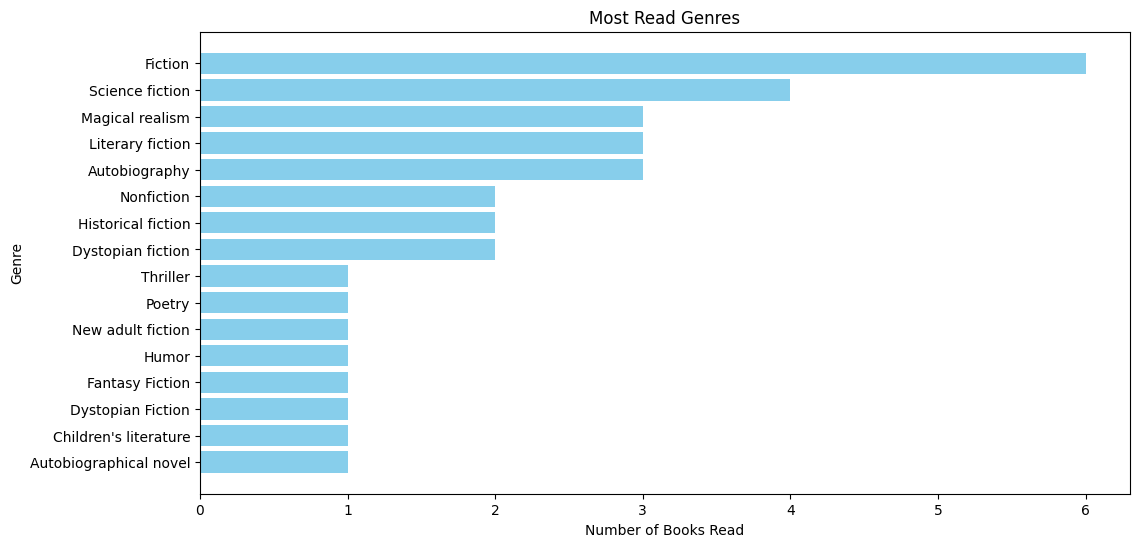

In [48]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(df_most_read_genres["genre"], df_most_read_genres["books_read"], color="skyblue")
plt.xlabel("Number of Books Read")
plt.ylabel("Genre")
plt.title("Most Read Genres")
plt.gca().invert_yaxis()  # Invert so the highest values appear on top
plt.show()


7️⃣ Which Booker Prize-winning authors appear the most?

👉 Identify authors who have won multiple Booker Prizes.

📌 Insight: Which authors have dominated the Booker Prize?

In [49]:
query = """
select author, count(*) as num_wins 
from booker_prize_winners 
group by author 
having num_wins > 1 
order by num_wins desc
"""

df_multiple_winners = pd.read_sql_query(query, conn)
display(df_multiple_winners) 

,author,num_wins
0,Margaret Atwood,2
1,Hilary Mantel,2


🔍 What This Query Does
✅ Counts how many times each author has won the Booker Prize (COUNT(*)).
✅ Groups results by author (GROUP BY author).
✅ **Filters for authors who have won more than once (HAVING num_wins > 1).
✅ Sorts in descending order to show the most frequent winners first (ORDER BY num_wins DESC).

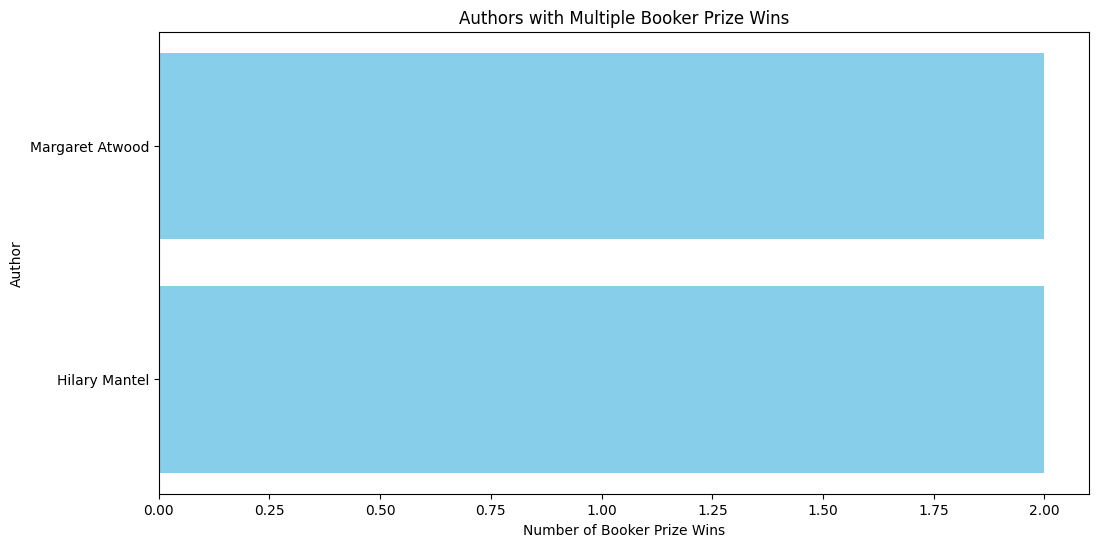

In [50]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(df_multiple_winners["author"], df_multiple_winners["num_wins"], color="skyblue")
plt.xlabel("Number of Booker Prize Wins")
plt.ylabel("Author")
plt.title("Authors with Multiple Booker Prize Wins")
plt.gca().invert_yaxis()  # Invert so the highest values appear on top
plt.show()


8️⃣ How does my rating compare to Goodreads for each book?

👉 Compare your ratings directly with Goodreads' ratings.

📌 Insight: Which books do you rate higher/lower than the average reader?

In [51]:
query = """
select title, my_rating, goodreads_rating, round(my_rating - goodreads_rating, 2) as rating_difference
from books_read
order by rating_difference desc 
"""
df_rating_comparison = pd.read_sql_query(query, conn)
display(df_rating_comparison) 

,title,my_rating,goodreads_rating,rating_difference
0,One Hundred Years of Solitude,5,4.10,0.90
1,Verge,4,3.67,0.33
2,The Martian,5,4.70,0.30
3,Things Fall Apart,4,3.71,0.29
4,Before the Coffee Gets Cold,4,3.75,0.25
5,The Catcher in the Rye,4,3.81,0.19
6,Frankenstein,4,3.84,0.16
7,Chronicle of a Death Foretold,4,3.97,0.03
8,Brave New World,4,3.99,0.01
9,Mrs. Palfrey at the Claremont,4,4.00,0.00


🔍 What This Query Does
✅ Displays book titles along with both my rating and Goodreads' rating.
✅ Computes the rating difference (ROUND(my_rating - goodreads_rating, 2)).
✅ Orders results from highest to lowest difference (ORDER BY rating_difference DESC).
✅ Shows which books I rated much higher/lower than Goodreads.

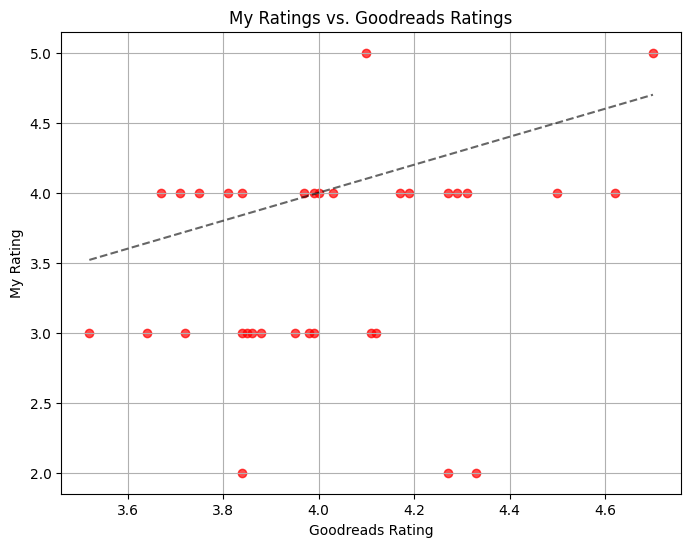

In [52]:
import matplotlib.pyplot as plt

# Plot Goodreads vs. My Rating
plt.figure(figsize=(8, 6))
plt.scatter(df_rating_comparison["goodreads_rating"], df_rating_comparison["my_rating"], alpha=0.7, color="red")

# Plot a reference line (y = x) to see where ratings match
plt.plot([min(df_rating_comparison["goodreads_rating"]), max(df_rating_comparison["goodreads_rating"])], 
         [min(df_rating_comparison["goodreads_rating"]), max(df_rating_comparison["goodreads_rating"])], 
         linestyle="dashed", color="black", alpha=0.6)

# Labels and title
plt.xlabel("Goodreads Rating")
plt.ylabel("My Rating")
plt.title("My Ratings vs. Goodreads Ratings")
plt.grid(True)

# Show the plot
plt.show()


9 What are my top-rated authors?

👉 Find authors where the average of my ratings is highest.

In [53]:
query = """
select author, round(avg(my_rating), 2) as avg_my_rating, count(*)  as books_read
from books_read
group by author 
having books_read > 2 
order by avg_my_rating desc 
limit 10
"""

df_top_authors = pd.read_sql_query(query, conn)
display(df_top_authors)

,author,avg_my_rating,books_read


🔍 What This Query Does
✅ Calculates the average of my ratings for each author (AVG(my_rating)).
✅ Rounds to 2 decimal places (ROUND(AVG(my_rating), 2)).
✅ Counts how many books I've read per author (COUNT(*) AS books_read).
✅ Filters for authors where I've read more than 2 books (HAVING books_read > 2).
✅ Orders the results from highest to lowest average rating (ORDER BY avg_my_rating DESC).
✅ Limits the results to my top 10 favorite authors (LIMIT 10).

2️⃣ Which Booker Prize books exceeded expectations?
👉 Find books where my predicted rating is higher than Goodreads’ average.

In [54]:
query = """
select 
bpw.title, bpw.author, bpw.genre, bpw.goodreads_rating, pr.average_rating_difference, round(bpw.goodreads_rating + pr.average_rating_difference, 2) as predicted_rating
from booker_prize_winners  bpw
join predicting_ratings pr
on bpw.genre = pr.genre
where bpw.year_won > 1999 
and round(bpw.goodreads_rating + pr.average_rating_difference, 2) > bpw.goodreads_rating 
order by predicted_rating desc
"""

df_exceeded_expectations = pd.read_sql_query(query, conn)
display(df_exceeded_expectations)

,title,author,genre,goodreads_rating,average_rating_difference,predicted_rating


3️⃣ Find my "hidden gems" (highly rated but less popular books)

👉 Find books where I rated 4+ stars but the Goodreads average is below 3.9.

In [55]:
query = """
SELECT title, author, genre, my_rating, goodreads_rating
FROM books_read
WHERE my_rating >= 4 AND goodreads_rating < 3.9
ORDER BY my_rating DESC;
"""

df_hidden_gems = pd.read_sql_query(query, conn)
display(df_hidden_gems)  # Show books I loved that Goodreads didn't

,title,author,genre,my_rating,goodreads_rating
0,Things Fall Apart,Chinua Achebe,Historical fiction,4,3.71
1,Before the Coffee Gets Cold,Toshikazu Kawaguchi,Magical realism,4,3.75
2,The Catcher in the Rye,J.D. Salinger,Fiction,4,3.81
3,Frankenstein,Mary Shelley,Science fiction,4,3.84
4,Verge,Lidia Yuknavitch,Literary fiction,4,3.67


5️⃣ Predict my next best-read genre based on my rating trends

👉 Find which genre I rate the highest over time.

In [56]:
query = """
SELECT genre, ROUND(AVG(my_rating), 2) AS avg_rating, COUNT(*) AS books_read
FROM books_read
GROUP BY genre
HAVING books_read > 3  -- Only include genres I've read multiple times
ORDER BY avg_rating DESC;
"""

df_best_read_genres = pd.read_sql_query(query, conn)
display(df_best_read_genres)  # Show the genres I rate the highest


,genre,avg_rating,books_read
0,Science fiction,4.00,4
1,Fiction,3.17,6


7️⃣ What are my least favorite genres?

👉 Find the genres I rate the lowest compared to Goodreads.

In [57]:
query = """
SELECT genre, 
       ROUND(AVG(my_rating), 2) AS avg_my_rating, 
       ROUND(AVG(goodreads_rating), 2) AS avg_goodreads_rating, 
       ROUND(AVG(my_rating - goodreads_rating), 2) AS avg_rating_gap,
       COUNT(*) AS books_read
FROM books_read
GROUP BY genre
HAVING books_read > 3  -- Only include genres I've read multiple times
ORDER BY avg_rating_gap ASC;
"""

df_least_favorite_genres = pd.read_sql_query(query, conn)
display(df_least_favorite_genres)  # Show my lowest-rated genres compared to Goodreads


,genre,avg_my_rating,avg_goodreads_rating,avg_rating_gap,books_read
0,Fiction,3.17,4.06,-0.90,6
1,Science fiction,4.00,4.17,-0.17,4


8️⃣ My Most "Controversial" Ratings (Books where my rating differs most from Goodreads)

👉 Find books where my rating is significantly different from Goodreads.

In [58]:
query = """
SELECT title, author, my_rating, goodreads_rating, 
       ROUND(ABS(my_rating - goodreads_rating), 2) AS rating_difference
FROM books_read
ORDER BY rating_difference DESC
LIMIT 10;
"""

df_controversial_books = pd.read_sql_query(query, conn)
display(df_controversial_books)  # Show books where my rating differs most from Goodreads


,title,author,my_rating,goodreads_rating,rating_difference
0,A Little Life,Hanya Yanagihara,2,4.33,2.33
1,To Kill a Mockingbird,Harper Lee,2,4.27,2.27
2,Woman of the Ashes,Mia Cuoto,2,3.84,1.84
3,The Handmaid's Tale,Margaret Atwood,3,4.12,1.12
4,Gone Girl,Gillian Flynn,3,4.11,1.11
5,Tales from the Cafe,Toshikazu Kawaguchi,3,3.99,0.99
6,Fahrenheit 451,Ray Bradbury,3,3.98,0.98
7,Talking as Fast as I Can,Lauren Graham,3,3.95,0.95
8,One Hundred Years of Solitude,Gabriel Garcia Marquez,5,4.10,0.90
9,Queenie,Candice Carty-Williams,3,3.88,0.88


9️⃣ What are the most "consistently rated" genres?

👉 Find genres where my ratings and Goodreads ratings are closest.

In [59]:
query = """
SELECT genre, 
       ROUND(AVG(my_rating), 2) AS avg_my_rating, 
       ROUND(AVG(goodreads_rating), 2) AS avg_goodreads_rating, 
       ROUND(AVG(ABS(my_rating - goodreads_rating)), 2) AS avg_rating_gap,
       COUNT(*) AS books_read
FROM books_read
GROUP BY genre
HAVING books_read > 3  -- Only include genres I've read multiple times
ORDER BY avg_rating_gap ASC;
"""

df_consistently_rated_genres = pd.read_sql_query(query, conn)
display(df_consistently_rated_genres)  # Show the most consistently rated genres


,genre,avg_my_rating,avg_goodreads_rating,avg_rating_gap,books_read
0,Science fiction,4.00,4.17,0.40,4
1,Fiction,3.17,4.06,0.97,6
